In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, cophenet, dendrogram

np.set_printoptions(suppress=True)   # To avoid number in exp form

from sklearn.metrics.pairwise import euclidean_distances

In [82]:
data=pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [83]:
# Visualize the data
# sns.pairplot(data)

## K_mean Clustering

In [84]:
sc=StandardScaler()

In [85]:
# Scale the data
data_s=sc.fit_transform(data)

In [86]:
data_s=pd.DataFrame(data_s,columns=data.columns)
data_s.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [87]:
# Identift the value of K
k_elbow=KElbowVisualizer(KMeans(),k=10)

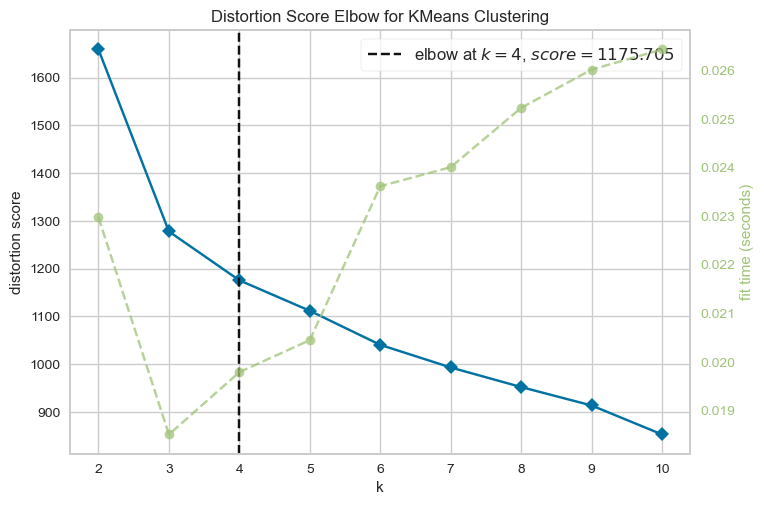

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
k_elbow.fit(data_s)
k_elbow.show()

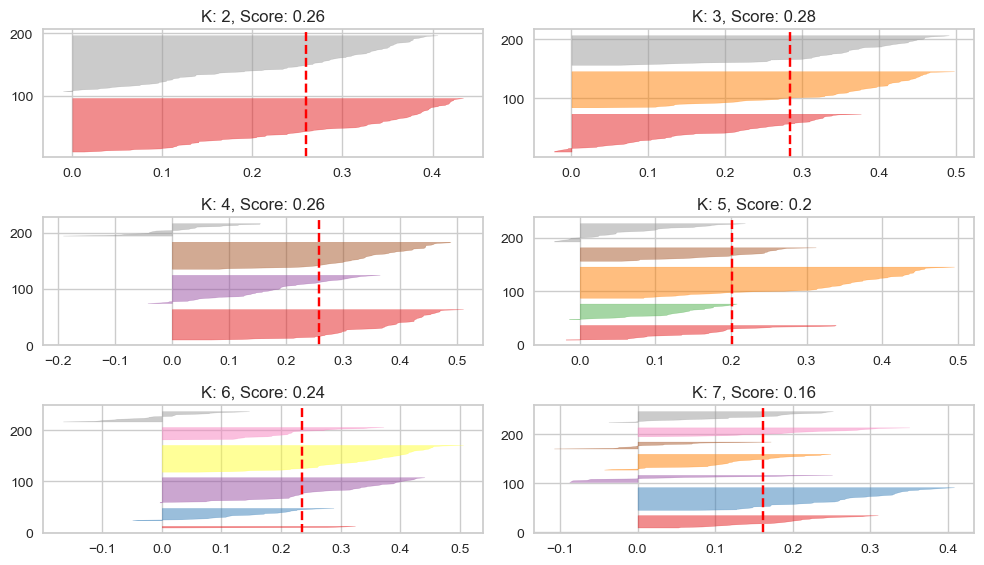

In [89]:
# Better way to visualize the silhouette score is by using yellow brick

t=1
plt.figure(figsize=(10,15))
for i in range(2,8):
    plt.subplot(8,2,t)
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(data_s)
    plt.title(f'K: {i}, Score: {np.round(sil_viz.silhouette_score_,2)}')
    t+=1
plt.tight_layout()
plt.show()

In [90]:
# We can go with k=3

In [91]:
final_kmeans=KMeans(n_clusters=3)

In [92]:
data['Pred_kmeans']=final_kmeans.fit_predict(data_s)

In [93]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_kmeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [94]:
data['Pred_kmeans'].value_counts()

Pred_kmeans
2    65
0    62
1    51
Name: count, dtype: int64

In [95]:
data.groupby('Pred_kmeans').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Pred_kmeans,,,,,,,,,,,,,
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [96]:
centroids=final_kmeans.cluster_centers_
centroids

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

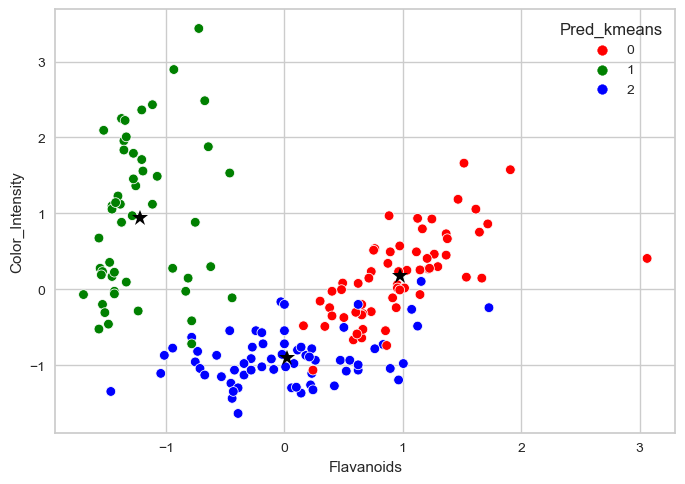

In [97]:
sns.scatterplot(x=data_s['Flavanoids'],y=data_s['Color_Intensity'],hue=data['Pred_kmeans'],\
                palette=['red','green','blue'])
for i in range(3):
    plt.plot(centroids[i][6],centroids[i][9],color='black',marker='*',ms=12)
plt.show()

## Agglometrative Clustering¶

In [98]:
# Lets Create a linkage matrix
link_mat=linkage(data_s, method='ward')  # Method can be single, complete,centroid,ward,average

In [99]:
link_mat.shape

(177, 4)

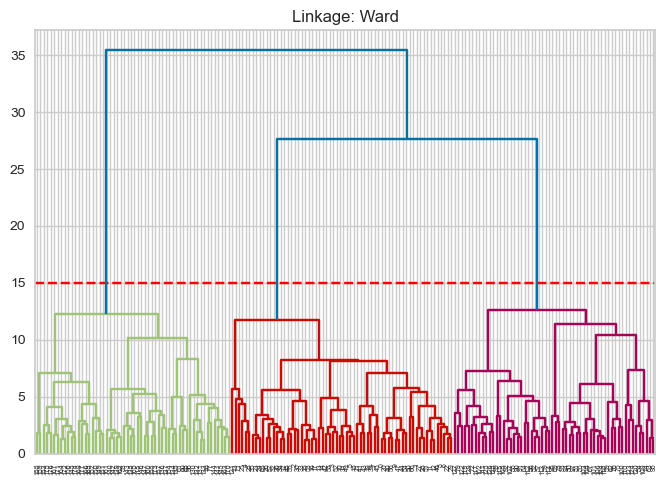

In [100]:
# Dendrogram
plt.title('Linkage: Ward')
plt.axhline(y=15,color='red',ls='--')
dendrogram(link_mat)
plt.show()

In [101]:
# K=3

In [102]:
# We can use silhouette score to select value of k
for i in [2,3,4,5]:
    model= AgglomerativeClustering(n_clusters=i,linkage='ward')
    pred=model.fit_predict(data_s)
    print(i,'k:',silhouette_score(data_s,pred))

2 k: 0.26701317712722306
3 k: 0.2774439826952266
4 k: 0.225836659334758
5 k: 0.18674235566758707


In [103]:
data.shape

(178, 14)

In [104]:
# Cophenetic Correlation Coeff
# it is the correlation b/w the cophenetic distance (Dendrogram Distance) and the actual distance

dist_matrix= euclidean_distances(data_s)
actual_dist=dist_matrix[np.triu_indices(178,k=1)]
ccc, cophenetic_dist=cophenet(link_mat,actual_dist)
print('Cophenetic Correlation Coeff:',ccc)

Cophenetic Correlation Coeff: 0.6623487206613261


In [105]:
final_agglo=AgglomerativeClustering(n_clusters=3)
data['Pred_agglo']=final_agglo.fit_predict(data_s)

In [106]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_kmeans,Pred_agglo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,2


In [107]:
data['Pred_agglo'].value_counts()

Pred_agglo
2    64
0    58
1    56
Name: count, dtype: int64

In [113]:
data.groupby('Pred_agglo').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_kmeans
Pred_agglo,,,,,,,,,,,,,,
0,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034,1.965517
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429,1.089286
2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875,0.093750


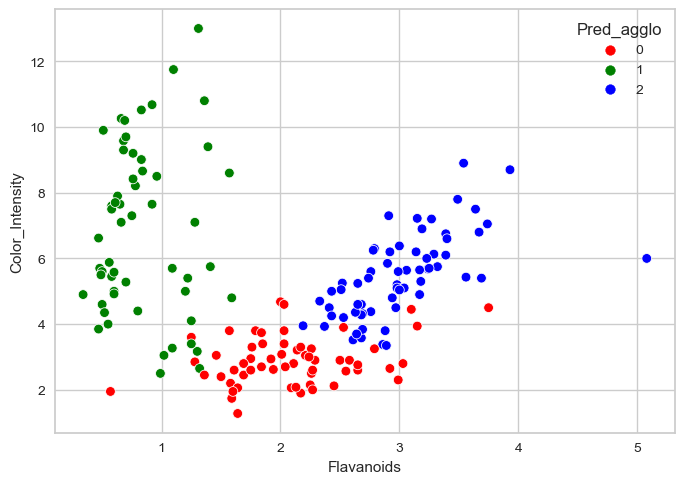

In [115]:
sns.scatterplot(x=data['Flavanoids'],y=data['Color_Intensity'],hue=data['Pred_agglo'],\
                palette=['red','green','blue','orange','magenta'])
plt.show()